<a href="https://colab.research.google.com/github/dsalcure/DHAUZ/blob/main/Cancellation_Marcos_alcure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd 
import seaborn as  sns 
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
import numpy as np
from pycaret.classification import *
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


In [114]:
df = pd.read_csv('/content/cancellation_prediction.csv')

In [7]:
#Etapa - 0 

In [8]:
#Etapa - 0 
  #Etapa- 0.1
df.columns

Index(['type', 'cancellation', 'days_between_booking_arrival',
       'year_arrival_date', 'month_arrival_date', 'week_number_arrival_date',
       'day_of_month_arrival_date', 'num_weekend_nights',
       'num_workweek_nights', 'num_adults', 'num_children', 'num_babies',
       'breakfast', 'country', 'market_segment', 'distribution_channel',
       'repeated_guest', 'num_previous_cancellations', 'num_previous_stays',
       'reserved_room', 'changes_between_booking_arrival', 'deposit_policy',
       'id_travel_agency_booking', 'id_person_booking', 'customer_type',
       'avg_price', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [9]:

#Visualizacao geral dos dados
#obs: Tem uns valores absurdos, tipo numero de bebes 10, adultos 50....vou trabalhar isso quando fizer a busca por outliers.  

df.describe()

,cancellation,days_between_booking_arrival,year_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,market_segment,distribution_channel,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,2.467577,1.702019,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,0.469512,101.718744,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,1.420967,0.681400,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,0.836030,47.823771,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,7.000000,4.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,3.000000,300.000000,8.000000,5.000000


In [10]:
# Etapa 1.1 -   Verificação de existência de dados nulos:
#Obs: Foram identificadas as colunas country, id_travel_agency_booking e id_person_booking com valores nulos. A coluna id_person_booking sera excluida do modelo, e a outras duas vou preencher com o KNNINPUTER do SKlearn, mas antes preciso tratar os dados. 
# Em relacao ao tipo do dado estao de acordo.
print(f'Número total de linhas no banco de dados = {df.shape[0]}\n')
print(f'Porcentagem de valores nulos por coluna:\n\n{(df.isnull().sum()/df.shape[0] *100).round(2)}\n\n')
print(f'Verificação do tipo de data:\n\n{df.dtypes}')

Número total de linhas no banco de dados = 119390

Porcentagem de valores nulos por coluna:

type                                0.00
cancellation                        0.00
days_between_booking_arrival        0.00
year_arrival_date                   0.00
month_arrival_date                  0.00
week_number_arrival_date            0.00
day_of_month_arrival_date           0.00
num_weekend_nights                  0.00
num_workweek_nights                 0.00
num_adults                          0.00
num_children                        0.00
num_babies                          0.00
breakfast                           0.00
country                             0.41
market_segment                      0.00
distribution_channel                0.00
repeated_guest                      0.00
num_previous_cancellations          0.00
num_previous_stays                  0.00
reserved_room                       0.00
changes_between_booking_arrival     0.00
deposit_policy                      0.00
id_tr

In [11]:
# Identificando as colunas nao numéricas 
nao_numerics = ['object', 'bool']
df_no_nnumeric = df.select_dtypes(include=nao_numerics)

In [12]:
# Verificando existencia de dados nulos nos nao numéricos e confirmando o dtype de cada coluna. 
df_no_nnumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   type                119390 non-null  object
 1   month_arrival_date  119390 non-null  object
 2   breakfast           119390 non-null  bool  
 3   country             118902 non-null  object
 4   reserved_room       119390 non-null  object
 5   deposit_policy      119390 non-null  object
dtypes: bool(1), object(5)
memory usage: 4.7+ MB


In [13]:
# Verificando valores errôneos (exemplo:digitação) 

#Nao foi identificado grafia errada, e como visto na tabeka acima estao sem dados nulos e com o tipo correto. 

for i in df_no_nnumeric.columns:
    print(i, df_no_nnumeric[i].unique())

type ['Fancy Hotel' 'Hotel']
month_arrival_date ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
breakfast [ True False]
country ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 

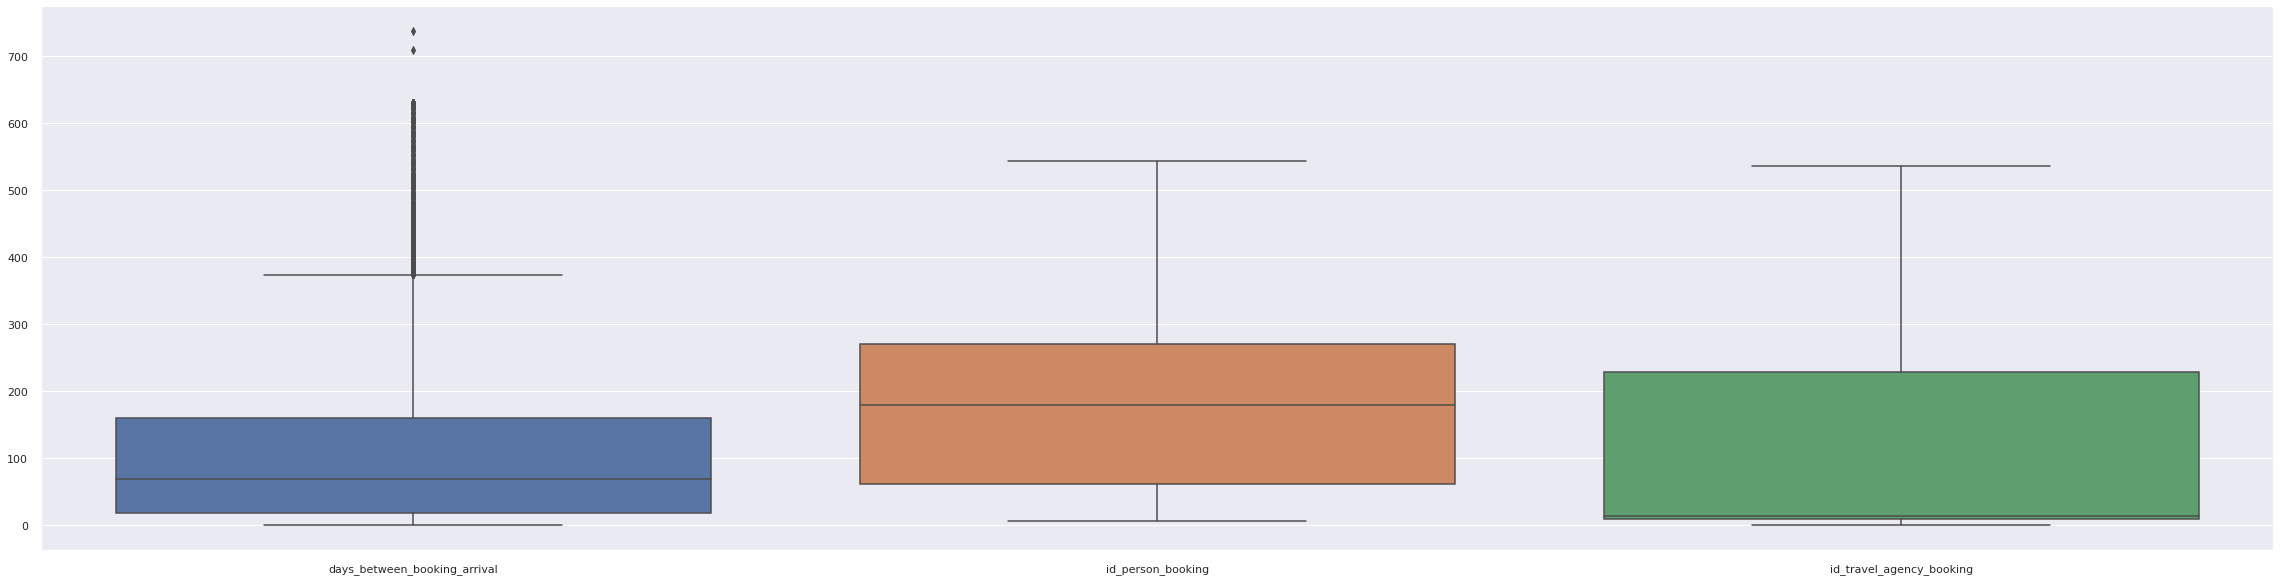

In [14]:
# Avaliando a existência de outliers nas colunas numéricas 1 de 2

# A ferramenta usada sera grafico de boxplot.

numerics = ['int64', 'float64']
df_numeric = df.select_dtypes(include=numerics)
sns.set(rc={"figure.figsize":(40, 10)})
sns.boxplot(data=df_numeric[['days_between_booking_arrival','id_person_booking','id_travel_agency_booking']])

In [15]:
## days_between_booking_arrival -

c =(df[df['days_between_booking_arrival']>=380]['cancellation'].sum()/df[df['days_between_booking_arrival']>380].shape[0]*100).round(0)

n= (df[df['days_between_booking_arrival']>=380]['cancellation'].count()/df.shape[0]*100).round(2)

print('Existe outliers acima de 380 dias, nao e possivel dizer se  e erro ou realmente pessoas que marcam suas viagens com bastante antecedencia dessa forma nao me sinto confortavel em tira los do modelo.\n')

print(f'Dos valores days_between_booking_arrival acima de 380 dias (outliers) existe uma prevalencia muito grande para o cancelamento de {c} % \n')

print(f'Porem uma quantidade de clientes muito pequena de apenas {n}% do total.\n')


Existe outliers acima de 380 dias, nao e possivel dizer se  e erro ou realmente pessoas que marcam suas viagens com bastante antecedencia dessa forma nao me sinto confortavel em tira los do modelo.

Dos valores days_between_booking_arrival acima de 380 dias (outliers) existe uma prevalencia muito grande para o cancelamento de 67.0 % 

Porem uma quantidade de clientes muito pequena de apenas 2.35% do total.



In [16]:
# Calculo da taxa de cancelamento por periodo de tempo correspondente a 25% dos seus cliente

l=[]

t_18_18 = (df[df['days_between_booking_arrival']<=18]['cancellation'].sum()/df[df['days_between_booking_arrival']<=18].shape[0]*100).round(2)
t_19_69 = (df[(df['days_between_booking_arrival']>18) & (df['days_between_booking_arrival']<69)]['cancellation'].sum()/df[(df['days_between_booking_arrival']>18) & (df['days_between_booking_arrival']<69)].shape[0]*100).round(2)
t_70_160 = (df[(df['days_between_booking_arrival']>=69) & (df['days_between_booking_arrival']<160)]['cancellation'].sum()/df[(df['days_between_booking_arrival']>=69) & (df['days_between_booking_arrival']<160)].shape[0]*100).round(2)
t_161_380 = (df[(df['days_between_booking_arrival']>160) & (df['days_between_booking_arrival']<380)]['cancellation'].sum()/df[(df['days_between_booking_arrival']>160) & (df['days_between_booking_arrival']<380)].shape[0]*100).round(2)
t_ouliers = (df[df['days_between_booking_arrival']>=380]['cancellation'].sum()/df[df['days_between_booking_arrival']>=380].shape[0]*100).round(2)
x= [t_18_18,t_19_69,t_70_160,t_161_380,t_ouliers]
for i in x:
    l.append(i)
    l.append(i)
t= [18,18,19,69,70,160,161,380,381,730]

d = {'Tempo':t ,'% canelamento':l}

d_canelamento_tempo_reserva  = pd.DataFrame(data=d)

In [17]:
fig = px.line(d_canelamento_tempo_reserva, x="Tempo", y="% canelamento", title='Cancelamento em % x tempo de antecedencia da reserva')
fig.show()

print('''

A taxas de cancelamento estao calculadas foram segmentadas nos por periodo de tempo correspondente a 25% dos seus cliente:

tempo 0 -18 - 25% dos clientes
tempo 19- 69 - 25% dos clientes 
tempo 70 - 160 - 25% dos clientes 
tempo > 160 25% dos clientes
tempo > 380 - outliers 

Observa-se que a taxa de cancelamento cresce a medida em que o tempo entre a reseva e a data de chegada no hotel aumenta. 

Eu sugeriria quatro acoes ao proprietario do hotel: 

1 - Uma acao de marketing com descontos para quem fizesse a reserva para os proximos 20 dias tentando assim aumentar a quantidade de clientes para entrar nessa faixa de cancelamento de 14.64% (hoje temos 25% dos clientes nessa faixa)

2 - A partir do tempo de 70 dias de antecedencia ja temos uma taxa de cancelamento expressiva, eu sugeriria um pagamento adiantado e se permitido por lei a devolucao parcial desse valor em caso de cancelamento.

3 - A partir do tempo de 160 dias tem-se uma desistencia de mais de 54% alem do citado no item dois sugeriria uma campanha de acompanhamento do cliente, envio de propagandas coisas q conseguisse nao deixar esfriar a vontade dele para ir ao hotel. Menssagem avisando que o hotel o aguarda ...
pois e um cliente que o hotel nao conquistou ainda. 

4- No caso de 380 para cima, talvez seja mais interessante nao abrir reservas, pois gera um custo operacional para empresa e pode perder clientes que mais a frente que nao cancelariam. Colocaria ele na lista de clientes e informaria quando tivesse mais pr'oximo das disponibilidades. 

 ''')



A taxas de cancelamento estao calculadas foram segmentadas nos por periodo de tempo correspondente a 25% dos seus cliente:

tempo 0 -18 - 25% dos clientes
tempo 19- 69 - 25% dos clientes 
tempo 70 - 160 - 25% dos clientes 
tempo > 160 25% dos clientes
tempo > 380 - outliers 

Observa-se que a taxa de cancelamento cresce a medida em que o tempo entre a reseva e a data de chegada no hotel aumenta. 

Eu sugeriria quatro acoes ao proprietario do hotel: 

1 - Uma acao de marketing com descontos para quem fizesse a reserva para os proximos 20 dias tentar aumentar a quantidade de clientes para entrar nessa faixa de cancelamento de 14.64% (hoje temos 25% dos clientes nessa faixa)

2 - A partir do tempo de 70 dias de antecedencia ja temos uma taxa de cancelamento expressiva, eu sugeriria um pagamento adiantado e se permitido por lei a devolucao parcial desse valor em caso de cancelamento.

3 - A partir do tempo de 160 dias tem-se uma desistencia de mais de 54% alem do citado no item dois suge

In [18]:
# Correlacao entre o cancelamento e o Tempo de reserva para a data da chegada, alto nivel de correlacao de 80,7%

print("Correlacao entre o cancelamento e o Tempo de reserva para a data da chegada, alto nivel de correlacao de 80,7%")

d_canelamento_tempo_reserva.corr()

Correlacao entre o cancelamento e o Tempo de reserva para a data da chegada, alto nivel de correlacao de 80,7%


,Tempo,% canelamento
Tempo,1.000000,0.807848
% canelamento,0.807848,1.000000


[Text(0, 0, 'cancellation'),
 Text(0, 0, 'week_number_arrival_date'),
 Text(0, 0, 'day_of_month_arrival_date'),
 Text(0, 0, 'num_weekend_nights'),
 Text(0, 0, 'num_workweek_nights'),
 Text(0, 0, 'num_adults'),
 Text(0, 0, 'num_children'),
 Text(0, 0, 'num_babies'),
 Text(0, 0, 'market_segment'),
 Text(0, 0, 'distribution_channel'),
 Text(0, 0, 'repeated_guest'),
 Text(0, 0, 'num_previous_cancellations'),
 Text(0, 0, 'num_previous_stays'),
 Text(0, 0, 'changes_between_booking_arrival'),
 Text(0, 0, 'customer_type'),
 Text(0, 0, 'avg_price'),
 Text(0, 0, 'required_car_parking_spaces'),
 Text(0, 0, 'total_of_special_requests')]

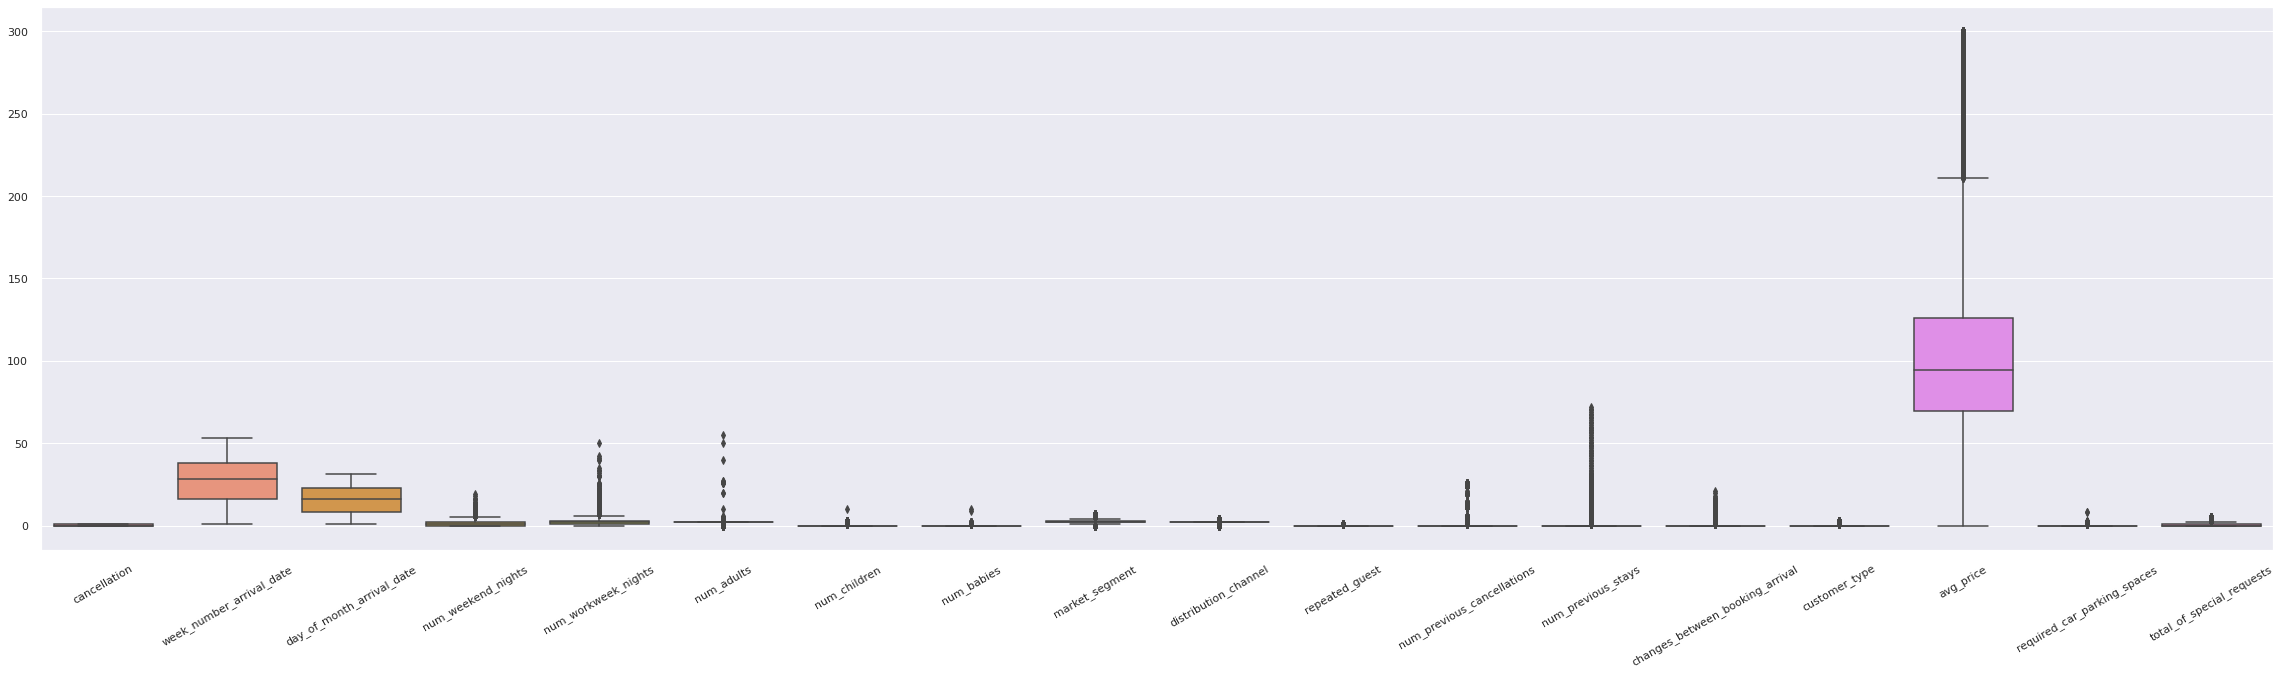

In [19]:
# Avaliando a existência de outliers nas colunas numéricas 2 de 2
ax = sns.boxplot(data=df_numeric[['cancellation', 'week_number_arrival_date', 'day_of_month_arrival_date','num_weekend_nights', 'num_workweek_nights', 'num_adults','num_children', 'num_babies', 'market_segment', 'distribution_channel','repeated_guest', 'num_previous_cancellations', 'num_previous_stays','changes_between_booking_arrival','customer_type', 'avg_price','required_car_parking_spaces', 'total_of_special_requests']])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [20]:
print(f"Valor maximo da hospedagem: {df_numeric['avg_price'].max()}")
print(f"Valor minimo da hospedagem: {df_numeric['avg_price'].min()}")
print("Nao faz sentido o valor da hospedagem ser zero, valor vai ser retirado.")

Valor maximo da hospedagem: 300.0
Valor minimo da hospedagem: 0.0
Nao faz sentido o valor da hospedagem ser zero, valor vai ser retirado.


In [21]:
# Taxa de cancelamento com a variacao media do preco
print('Para o calculo os valores de outiliers, foram mantidos, pode ser algum momento especial que por algum motivo ocorreu esse aumento de preco chegando no maximo a um valor de R$ 300 reais.')

valor=[]
cancelamento = []
for i in df_numeric['avg_price'].unique():
      valor.append(i)
      cancelamento.append((df[df['avg_price']==i]['cancellation'].sum()/df[df['avg_price']==i].shape[0]*100).round(2))

d = {'Avg_price':valor ,'% canelamento':cancelamento}

d_canelamento_avg_price  = pd.DataFrame(data=d)

Para o calculo os valores de outiliers, foram mantidos, pode ser algum momento especial que por algum motivo ocorreu esse aumento de preco chegando no maximo a um valor de R$ 300 reais.


In [22]:
print("Retirando valor de preco zero !")

d_canelamento_avg_price  =  d_canelamento_avg_price[d_canelamento_avg_price['Avg_price']!=0]


Retirando valor de preco zero !


In [23]:
# Correalcao entre o aumento do preco medio e o numero de cancelamento
d_canelamento_avg_price.corr()

print('Achei a correlacao 16% muito baixa, vou analizar o num_previous_stays para ver se consigo fazer uma recomendacao melhor.')

Achei a correlacao 16% muito baixa, vou analizar o num_previous_stays para ver se consigo fazer uma recomendacao melhor.


In [24]:
# Para o num_previous_stays vou retirar os outliers usando o intervalo de confianca de 95% 

print("Para o num_previous_stays retirei os outliers identificados no boxplot usando o intervalo de confianca de 95% ")

media_finan = df['num_previous_stays'].mean()
desvp_finan = df['num_previous_stays'].std()

df = df[(df['num_previous_stays']>= media_finan-(desvp_finan*3)) & (df['num_previous_stays'] <= media_finan+(desvp_finan*3))]

Para o num_previous_stays retirei os outliers identificados no boxplot usando o intervalo de confianca de 95% 


In [25]:
print(f"Apos retirar os outliers o numero max de estadias anteriores ficou em {df['num_previous_stays'].max()}")


Apos retirar os outliers o numero max de estadias anteriores ficou em 4


In [26]:
valor=[]
cancelamento = []
for i in df['num_previous_stays'].unique():
      valor.append(i)
      cancelamento.append((df[df['num_previous_stays']==i]['cancellation'].sum()/df[df['num_previous_stays']==i].shape[0]*100).round(2))

d = {'num_previous_stays':valor ,'% canelamento':cancelamento}

d_canelamento_num_previous_stays  = pd.DataFrame(data=d)

In [27]:
print("Existe uma alta correlacao entre o numero de estadias e a taxa de cancelamento de 70% observa-se que'e inversa, ou seja quanto maior o numero de estadias anteriores o cliente tem  menor a chance do cliente cancelar")
d_canelamento_num_previous_stays.corr()

Existe uma alta correlacao entre o numero de estadias e a taxa de cancelamento de 70% observa-se que'e inversa, ou seja quanto maior o numero de estadias anteriores o cliente tem  menor a chance do cliente cancelar


,num_previous_stays,% canelamento
num_previous_stays,1.000000,-0.707331
% canelamento,-0.707331,1.000000


In [28]:
print("""Ao vermos os valores na tabela abaixo, observa se que tem uma descontinuidade ou seja sao grupos diferentes,

o primeiro grupo seria aqueles que nunca estiveram no hotel com uma taxa de cancelamento expressiva em torno de 38% 
e o segundo grupo sao os que ja visitaram o hotel o que faz com que a taxa de cancelamento seja bem menor em torno de 5%.
Esse fato 'e positivo, indica que os clientes que ja estiveram no hotel , gostaram da experiencia uma vez que fazem um esforco maior p nao cancelarem.

Eu proporia uma acao para o dono do hotel:

Trabalhar com esses clientes que ja estiveram no hotel, acessando as midias deles, tentando transforma los em vetores de propaganda para o hotel.
Possivelmente esses clientes tiveram bons momentos no hotel e teriam prazer em divulgar. Uma acao dessas pode estimular a um novo hospede a nao cancelar.
Tentar manter por perto esses clientes que ate oferecendo descontos (investimento em marketing).
Promocao de indicar um amigo e ganhar um desconto.

""")
d_canelamento_num_previous_stays

Ao vermos os valores na tabela abaixo, observa se que tem uma descontinuidade ou seja sao grupos diferentes,

o primeiro grupo seria aqueles que nunca estiveram no hotel com uma taxa de cancelamento expressiva em torno de 38% 
e o segundo grupo sao os que ja visitaram o hotel o que faz com que a taxa de cancelamento seja bem menor em torno de 5%.
Esse fato 'e positivo, indica que os clientes que ja estiveram no hotel , gostaram da experiencia uma vez que fazem um esforco maior p nao cancelarem.

Eu proporia uma acao para o dono do hotel:

Trabalhar com esses clientes que ja estiveram no hotel, acessando as midias deles, tentando transforma los em vetores de propaganda para o hotel.
Possivelmente esses clientes tiveram bons momentos no hotel e teriam prazer em divulgar. Uma acao dessas pode estimular a um novo hospede a nao cancelar.
Tentar manter por perto esses clientes que retornaram ate oferecendo descontos (investimento em marketing).




,num_previous_stays,% canelamento
0,0,38.03
1,1,5.12
2,2,5.52
3,3,5.11
4,4,5.24


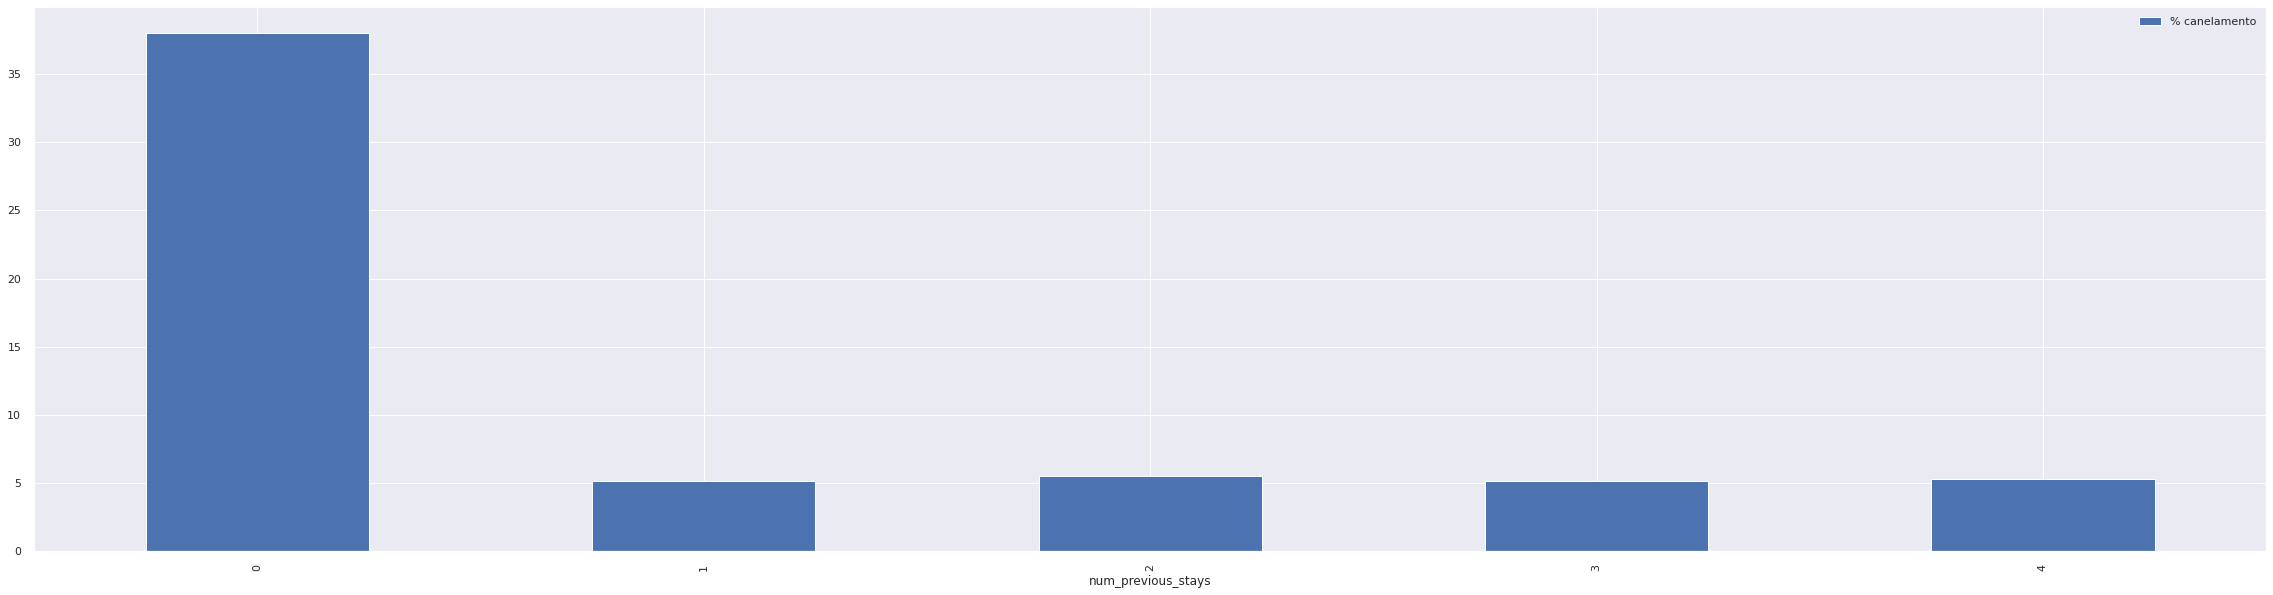

In [29]:
d_canelamento_num_previous_stays.plot.bar(x='num_previous_stays',y='% canelamento')

In [30]:
print("Poderia realizar analises nas outras features, mas o tempo e curto , vou seguir p fazer o modelo preditivo.")

Poderia realizar analises nas outras features, mas o tempo e curto , vou seguir p fazer o modelo preditivo.


In [31]:
print("""Como visto nos boxplots acima existe uma grande quantidade de features com outliers. Vou trata-los agora. 
Para tal vou assumir o intervalo de confianca de 95% , os dados que estiverem fora desse intervalo serao excluidos.""")


Como visto nos boxplots acima existe uma grande quantidade de features com outliers. Vou trata-los agora. 
Para tal vou assumir o intervalo de confianca de 95% , os dados que estiverem fora desse intervalo serao excluidos.


In [32]:
print("Dataframe somente com os valores numericos, o unico numerico que vou aceitar os outliers vai ser o 'avg_price', os outros vao entrar ter que respeitar o intervalo de confianca de 95% ")

df_numeric = df_numeric[[ 'num_babies','cancellation', 'week_number_arrival_date', 'day_of_month_arrival_date','num_weekend_nights', 'num_workweek_nights', 'num_adults','num_children', 'market_segment', 'distribution_channel','repeated_guest',  'num_previous_stays','changes_between_booking_arrival','customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]

Dataframe somente com os valores numericos, o unico numerico que vou aceitar os outliers vai ser o 'avg_price', os outros vao entrar ter que respeitar o intervalo de confianca de 95% 


In [33]:
print("DataFrame com os Outliers removidos.")

for i in df_numeric:
  media_finan = df[i].mean()
  desvp_finan = df[i].std()
  df = df[(df[i] >= media_finan-(desvp_finan*3)) & (df[i] <= media_finan+(desvp_finan*3))]

DataFrame com os Outliers removidos.


In [34]:
## PRÉPROCESSAMENTO

In [35]:
print("""Vou transformar os valores nao numéricos (variáveis categóricas) em numéricos.

Para isso preciso definir se serão ordinais, ou seja, dotadas de uma ordem lógica ou qualitativa nominal onde não existe uma ordenação.

Vou identificar a % de cancelamento em cada uma dessas variáveis para ver se existe alguma lógica para ordenalos.""") 



Vou transformar os valores nao numéricos (variáveis categóricas) em numéricos.

Para isso preciso definir se serão ordinais, ou seja, dotadas de uma ordem lógica ou qualitativa nominal onde não existe uma ordenação.

Vou identificar a % de cancelamento em cada uma dessas variáveis para ver se existe alguma lógica para ordenalos.


In [36]:
for i in df_no_nnumeric.columns:
  print ((df.groupby(i)['cancellation'].sum()/df.groupby(i)['cancellation'].count()).round(2))

type
Fancy Hotel    0.33
Hotel          0.44
Name: cancellation, dtype: float64
month_arrival_date
April        0.45
August       0.42
December     0.39
February     0.38
January      0.35
July         0.41
June         0.46
March        0.36
May          0.44
November     0.35
October      0.41
September    0.43
Name: cancellation, dtype: float64
breakfast
False    0.39
True     0.42
Name: cancellation, dtype: float64
country
ABW    0.00
AGO    0.43
ALB    0.20
AND    1.00
ARE    0.86
ARG    0.28
ARM    0.29
ASM    0.00
ATA    0.00
ATF    0.00
AUS    0.27
AUT    0.18
AZE    0.50
BDI    0.00
BEL    0.22
BEN    1.00
BFA    0.00
BGD    0.73
BGR    0.14
BHR    0.67
BHS    0.00
BIH    0.23
BLR    0.39
BOL    0.00
BRA    0.40
BRB    0.00
CAF    0.00
CHE    0.26
CHL    0.33
CHN    0.48
CIV    0.40
CMR    0.00
CN     0.21
COL    0.37
COM    0.00
CPV    0.43
CRI    0.06
CUB    0.00
CYM    0.00
CYP    0.24
CZE    0.23
DEU    0.17
DMA    0.00
DNK    0.26
DOM    0.50
DZA    0.18
ECU    0.29
EGY  

In [37]:
# type - Foi considerado que o Fancy Hotel tem uma menor chance de cancelamento (dessa forma será ordenado de forma ordinária.)
df['type'].replace({'Fancy Hotel':0 ,'Hotel':1}, inplace=True)        

In [38]:
# month_arrival_date - Existe uma sequência temporal (dessa forma será ordenado de forma ordinária)

df['month_arrival_date'].replace({'January':1,'February':2 ,'March':3 ,'April':4,'May':5, 'June':6 ,'July':7, 'August':8 ,'September':9,'October': 10 , 'November':11,'December':12 }, inplace=True)   

In [39]:
# deposit_policy - Foi considerei que o Non Refund, No Deposit, Non Refund estão em ordem crescente de risco de cancelamento (dessa forma será ordenado de forma ordinária.)

df['deposit_policy'].replace({'Refundable':0 ,'No Deposit':1 ,'Non Refund':2}, inplace=True)    



In [40]:
# reserved_room , country e breakfast - vou considerar sem ordenação (para isso vou usar a função get_dummies).

#Tirando de boleano para poder usar o dummy
df['breakfast'].replace({True:'T',False:'F'},inplace=True)


dummy = pd.get_dummies(df[['reserved_room','country','breakfast']])
df = pd.merge(
    left=df,
    right=dummy,
    left_index=True,
    right_index=True,)

df.drop(columns=['reserved_room','country','breakfast'],inplace=True)

In [41]:
pd.set_option('display.max_columns', None)
df.head(5)

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,market_segment,distribution_channel,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,deposit_policy,id_travel_agency_booking,id_person_booking,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests,reserved_room_A,reserved_room_B,reserved_room_C,reserved_room_D,reserved_room_E,reserved_room_F,reserved_room_G,reserved_room_H,reserved_room_L,country_ABW,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,breakfast_F,breakfast_T
2,0,0,7,2015,7,27,1,0,1,1,0.0,0,0,0,0,0,0,0,1,NaN,NaN,0,75.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,1,1,0,0,0,0,1,304.0,NaN,0,75.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,2,2,0,0,0,0,1,240.0,NaN,0,98.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [42]:
# vou retirar a coluna id_person_booking (informação de id de cliente nao ajuda na criação do ML)

#obs: id_travel_agency_booking retirei pq estava dando um trabalho computacional muito grande p preencher os vazios. Com fim didatico eu retirei, numa simulacao real eu pagaria esse custo. 

df.drop(columns=['id_person_booking','id_travel_agency_booking'], inplace=True)


In [43]:
# Normalizando os valores em escalas diferentes aqui vou usar o MaxMinScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

df_normalizado = pd.DataFrame(scaled, columns = df.columns)

In [44]:
df_normalizado

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,market_segment,distribution_channel,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,deposit_policy,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests,reserved_room_A,reserved_room_B,reserved_room_C,reserved_room_D,reserved_room_E,reserved_room_F,reserved_room_G,reserved_room_H,reserved_room_L,country_ABW,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,breakfast_F,breakfast_T
0,0.0,0.0,0.011129,0.0,0.545455,0.500000,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.020668,0.0,0.545455,0.500000,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.2,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [45]:
# Foram encontrados valores nulos nas colunas [country, id_travel_agency_booking] preenchendos esses valores com KNNImputer (vizinhos mais proximos)

nan = np.nan
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_numbers_nan = imputer.fit_transform(scaled)
df_normalizado_nulos_tratados  = pd.DataFrame(df_numbers_nan, columns = df.columns)

In [46]:
df_normalizado_nulos_tratados

,type,cancellation,days_between_booking_arrival,year_arrival_date,month_arrival_date,week_number_arrival_date,day_of_month_arrival_date,num_weekend_nights,num_workweek_nights,num_adults,num_children,num_babies,market_segment,distribution_channel,repeated_guest,num_previous_cancellations,num_previous_stays,changes_between_booking_arrival,deposit_policy,customer_type,avg_price,required_car_parking_spaces,total_of_special_requests,reserved_room_A,reserved_room_B,reserved_room_C,reserved_room_D,reserved_room_E,reserved_room_F,reserved_room_G,reserved_room_H,reserved_room_L,country_ABW,country_AGO,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,breakfast_F,breakfast_T
0,0.0,0.0,0.011129,0.0,0.545455,0.500000,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.020668,0.0,0.545455,0.500000,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.2,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [47]:
# Verificacao de desbalanceamaneto do target cancellation

print('Verificacao de desbalanceamaneto do target:cancellation')

print(df_normalizado_nulos_tratados['cancellation'].value_counts())

print(f"Porcentagem de classificacao 0 {(df_normalizado_nulos_tratados['cancellation'].value_counts()[0]/df_normalizado_nulos_tratados['cancellation'].shape[0]*100).round(2)}%")

print(f"Porcentagem de classificacao 0 {(df_normalizado_nulos_tratados['cancellation'].value_counts()[1]/df_normalizado_nulos_tratados['cancellation'].shape[0]*100).round(2)}%")

print("Esta bem balanceado ! ")

Verificacao de desbalanceamaneto do target:cancellation
0.0    57233
1.0    39987
Name: cancellation, dtype: int64
Porcentagem de classificacao 0 58.87%
Porcentagem de classificacao 0 41.13%
Esta bem balanceado ! 


In [65]:
# Dividindo a lista em features e target

list1 = df_normalizado_nulos_tratados.columns.to_list()
excluded_index = [1]
features = [i for n, i in enumerate(list1) if n not in excluded_index]
target = df_normalizado_nulos_tratados.columns.to_list().pop(1)

x = df_normalizado_nulos_tratados[features]
y = df_normalizado_nulos_tratados[target]

In [68]:
# Dividindo em dados de teste e treino 

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.8)

In [72]:
# Instanciando o modelo 
log_regression = LogisticRegression()


In [74]:
# Fit usando o Train Data

log_regression.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
# Usando o modelo para fazer previsoes nos dadso de testes

y_pred = log_regression.predict(x_test)

In [81]:
# Matriz de confusao (identificar erro do tipo I e erros do tipo II)

metrics.confusion_matrix(y_test, y_pred)

print("""

Da Matrix de confusao, tem-se:

Verdadeiros positivos 10329
Verdadeiros negativos  5054
Falsos Positivos 2883
Falso Negativo 1178

""")



Da Matrix de confusao, tem-se:

Verdadeiros positivos 10329
Verdadeiros negativos  5054
Falsos Positivos 2883
Falso Negativo 1178




In [148]:
print("uma Accuracy significativa de:",metrics.accuracy_score(y_test, y_pred).round(2))

uma Accuracy significativa de: 0.79


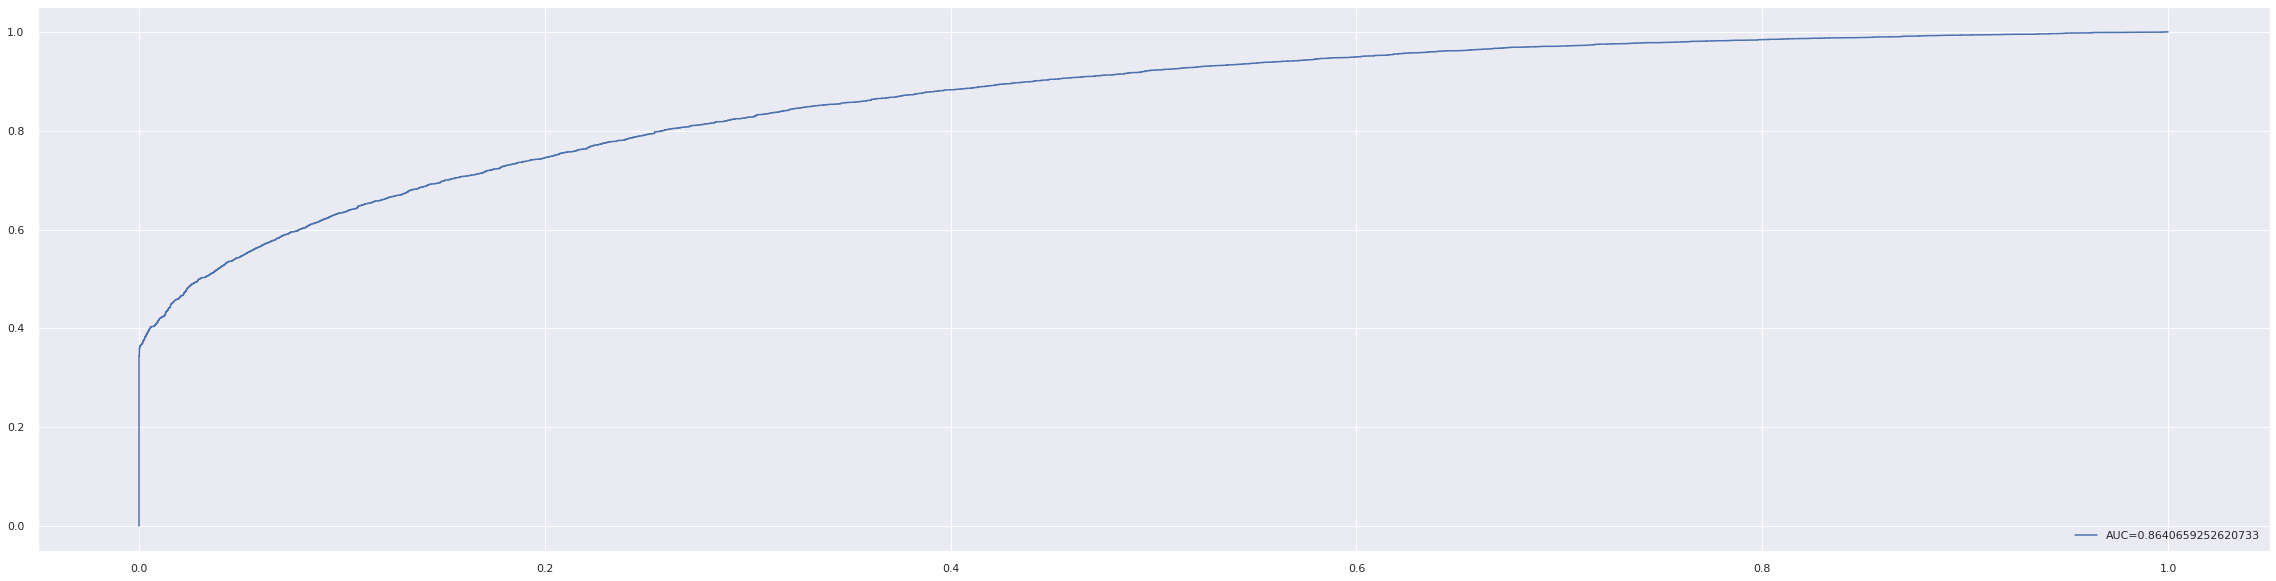

In [87]:
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [147]:
# Metrics: Recall, Precision, F1

print(f"Recall:{recall_score(y_test, y_pred, average='macro').round(2)}")

print(f"Precision :{precision_score(y_test, y_pred, average='macro').round(2)}")

print(f"F1:{f1_score(y_test, y_pred, average='macro').round(2)}")

Recall:0.77
Precision :0.8
F1:0.77


In [116]:
# Separacao entre treino e teste temporal (treino: 2015, 2016 e teste: 2017)

print(""" A separacao por treino e teste em periodos diferentes, pressupoem que nao ocorram mudancas no ecosistema do negocio. 

Um exemplo atual seria a pandemia, usar dados de treino do momento da pandemia e de teste do momento p'os pandemia , nao faz sentido o modelo nao responderia bem. 

Se o ecossistema do negocio permanecer o mesmo os resultados podem ficar semelhantes, mas voce depende de fatores externos os quais voce nao controla e as vezes pode ser dificil ate de identifica-los.

Alem de eventos como o da pandemia, existe tambem a questao da sazionalidade, quando vc trabalha separando os dados de maneira temporal o que dificulta o resultado da analise.

Dessa forma eu iria sempre para a separacao aleat'oria. 

""")


 A separacao por treino e teste em periodos diferentes, pressupoem que nao ocorreram mudancas no ecosistema do negocio. 

Um exemplo atual seria a pandemia, usar dados de treino do momento da pandemia e de teste do momento p'os pandemia , nao faz sentido o modelo nao responderia bem. 

Se o ecossistema do negocio permanecer o mesmo os resultados podem ficar semelhantes, mas voce depende de fatores externos os quais voce nao controla e as vezes pode ser dificil ate de identifica-lo.

Alem de eventos como o da pandemia, existe a questao da sazionalidade, quando vc trabalha separando os dados de maneira temporal tem que ter isso em mente tamb'em. 

Dessa forma eu iria sempre para a separacao aleat'oria. 




In [156]:
# Conclusao:

print(f"""                                CONCLUSAO:

Recomendacoes e acoes  baseadas nos dados :

                                         Ao observar o tempo de antecdencia da reserva:

A taxas de cancelamento estao calculadas foram segmentadas nos por periodo de tempo correspondente a 25% dos seus cliente:

tempo 0 -18 - 25% dos clientes
tempo 19- 69 - 25% dos clientes 
tempo 70 - 160 - 25% dos clientes 
tempo > 160 25% dos clientes
tempo > 380 - outliers 



Observa-se que a taxa de cancelamento cresce a medida em que o tempo entre a reseva e a data de chegada no hotel aumenta. 

Eu sugeriria quatro acoes ao proprietario do hotel: 

1 - Uma acao de marketing com descontos para quem fizesse a reserva para os proximos 20 dias tentando assim aumentar a quantidade de clientes para entrar nessa faixa de cancelamento de 14.64% (hoje temos 25% dos clientes nessa faixa)

2 - A partir do tempo de 70 dias de antecedencia ja temos uma taxa de cancelamento expressiva, eu sugeriria um pagamento adiantado e se permitido por lei a devolucao parcial desse valor em caso de cancelamento.

3 - A partir do tempo de 160 dias tem-se uma desistencia de mais de 54% alem do citado no item dois sugeriria uma campanha de acompanhamento do cliente, envio de propagandas coisas q conseguisse nao deixar esfriar a vontade dele para ir ao hotel. Menssagem avisando que o hotel o aguarda ...
pois e um cliente que o hotel nao conquistou ainda. 

4- No caso de 380 para cima, talvez seja mais interessante nao abrir reservas, pois gera um custo operacional para empresa e pode perder clientes que mais a frente que nao cancelariam. Colocaria ele na lista de clientes e informaria quando tivesse mais pr'oximo das disponibilidades. 



                                                  Ao observar a quantidade de estadias anteriores:



Ao vermos os valores na tabela abaixo, observa se que tem uma descontinuidade ou seja sao grupos diferentes.


{d_canelamento_num_previous_stays}


o primeiro grupo seria aqueles que nunca estiveram no hotel com uma taxa de cancelamento expressiva em torno de 38% 
e o segundo grupo sao os que ja visitaram o hotel o que faz com que a taxa de cancelamento seja bem menor em torno de 5%.
Esse fato 'e positivo, indica que os clientes que ja estiveram no hotel , gostaram da experiencia uma vez que fazem um esforco maior p nao cancelarem.

Eu proporia uma acao para o dono do hotel:

Trabalhar com esses clientes que ja estiveram no hotel, acessando as midias deles, tentando transforma los em vetores de propaganda para o hotel.
Possivelmente esses clientes tiveram bons momentos no hotel e teriam prazer em divulgar. Uma acao dessas pode estimular a um novo hospede a nao cancelar.
Tentar manter por perto esses clientes que ate oferecendo descontos (investimento em marketing).
Promocao de indicar um amigo e ganhar um desconto.

                                                                  Modelo de Preditico

Modelo adotado : Regressao Logistica 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

                                                                        Metricas

Metricas que sustentam a qualidade do modelo adotado. (obs: nao estou entrando aqui na teoria das metricas, tem na literatura - apenas presentando os resultados)

Matriz de confusao:

Verdadeiros positivos 10329 
Verdadeiros negativos  5054
Falsos Positivos 2883
Falso Negativo 1178

Recall, Precision , F1:

Recall:0.77
Precision :0.8
F1:0.77

Accuracy: 0.79 

AUC: 0.86  


    
                                                          Separacao entre treino e teste temporal (treino: 2015, 2016 e teste: 2017)


A separacao por treino e teste em periodos diferentes, pressupoem que nao ocorram mudancas no ecosistema do negocio. 

Um exemplo atual seria a pandemia, usar dados de treino do momento da pandemia e de teste do momento p'os pandemia , nao faz sentido o modelo nao responderia bem. 

Se o ecossistema do negocio permanecer o mesmo os resultados podem ficar semelhantes, mas voce depende de fatores externos os quais voce nao controla e as vezes pode ser dificil ate de identifica-los.

Alem de eventos como o da pandemia, existe tambem a questao da sazionalidade, quando vc trabalha separando os dados de maneira temporal o que dificulta o resultado da analise.

Dessa forma eu iria sempre para a separacao aleat'oria.


                                                                     Trabalhos futuros e sugestoes:

O trabalho nao foi levado a exaustao, poderia-se explorar as outras features para mais recomendacoes, com certeza pode-se recomendar mais solucoes. 

Uma coisa que poderia ser feito para uma outa abordagem 'e estudar se podemos trabalhar de forma diferente para HOTEL e Fancy Hotel. Derrepente sao universos diferentes que podem demandar recomendacoes diferentes, pela questao do tempo nao quis entrar nesse m'erito. 
Mas valeria uma analise de cluster para entender se esses dois modelos de hoteis ficariam em clusters diferentes. Caso afirmativo as analises seriam feitas em duas frentes separadas cluster 1 e cluster2 (Hotel e Fancy Hotel).

Outra sugestao seria tentar reduzir atraves de PCA a quantidade de features. 

sds,
Marcos Alcure 

""")




                                CONCLUSAO:

Recomendacoes e acoes  baseadas nos dados :

                                         Ao observar o tempo de antecdencia da reserva:

A taxas de cancelamento estao calculadas foram segmentadas nos por periodo de tempo correspondente a 25% dos seus cliente:

tempo 0 -18 - 25% dos clientes
tempo 19- 69 - 25% dos clientes 
tempo 70 - 160 - 25% dos clientes 
tempo > 160 25% dos clientes
tempo > 380 - outliers 



Observa-se que a taxa de cancelamento cresce a medida em que o tempo entre a reseva e a data de chegada no hotel aumenta. 

Eu sugeriria quatro acoes ao proprietario do hotel: 

1 - Uma acao de marketing com descontos para quem fizesse a reserva para os proximos 20 dias tentando assim aumentar a quantidade de clientes para entrar nessa faixa de cancelamento de 14.64% (hoje temos 25% dos clientes nessa faixa)

2 - A partir do tempo de 70 dias de antecedencia ja temos uma taxa de cancelamento expressiva, eu sugeriria um pagamento adiantado